# Analyse des accidents d'avion
Dernière mise à jour : 27 janvier 2025

Défi quotidien : analyse des accidents d'avion et des décès

### Objectif:
Utilisez Python, Pandas, NumPy et SciPy pour réaliser une analyse approfondie de l'ensemble de données « Crashs et décès d'avions jusqu'en 2023 ». Ce défi comprendra le nettoyage des données, l'analyse exploratoire, les tests statistiques et la visualisation afin d'en tirer des enseignements pertinents.



### Ensemble de données :
Utilisez l'ensemble de données « Crashs et décès d'avion jusqu'en 2023 », qui fournit des informations complètes sur les accidents d'avion, notamment les dates, les lieux, les décès, etc. Accédez à l'ensemble de données ici .

In [13]:
# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
import pandas as pd  # ← à ajouter impérativement

# Chargement du fichier CSV avec encodage compatible
df = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv", encoding='latin1')


In [15]:
# Aperçu des premières lignes
df.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


Analyse :
Les premières entrées montrent que le dataset couvre une large période (dès 1908), avec des accidents variés (démonstration, essais, vols commerciaux, etc.), et différentes causes rapportées dans le résumé. Cela indique une bonne diversité pour l’analyse.

## 1. Nettoyage des données

In [16]:
# Affichage des infos générales
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4221 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew        4757 non-null   float64
 15  Grou

Nombre de lignes : 4998 accidents répertoriés.

Colonnes manquantes : Plusieurs colonnes présentent des valeurs manquantes, surtout pour le numéro de vol, le nombre de passagers/équipage, etc. Cela impose de la prudence dans les analyses statistiques.

Types de données : Beaucoup de colonnes sont de type object (texte), ce qui peut limiter certaines analyses quantitatives.

Analyse de ce résultat :

* **Complétude des données** :

  * Très peu de valeurs manquantes pour les colonnes principales ("Date", "Location", "Operator", "AC Type", "Aboard", "Fatalities").
  * Colonnes avec beaucoup de valeurs manquantes : "Time", "Flight #", "Route", "Registration", "cn/ln", "Aboard Passangers", "Aboard Crew", "Fatalities Passangers", "Fatalities Crew". Cela limite la précision des analyses détaillées sur ces champs.

* **Types de données** :

  * Beaucoup de colonnes sont au format "object" (texte), donc un prétraitement sera nécessaire pour les analyses numériques, notamment sur les dates.
  * Les données quantitatives sont bien reconnues en "float64", ce qui facilite les calculs statistiques.

* **Taille de l’échantillon** :

  * 4998 accidents, donc base statistique solide et représentative.

* **Remarque** :

  * Les valeurs manquantes devront être gérées (imputation, suppression, etc.) selon l’analyse ciblée, pour éviter des biais ou des erreurs.

Résumé :
Le dataset est riche et exploitable, mais nécessite un nettoyage, surtout pour les analyses par sous-groupes (vols, équipages, type d’accident, etc.).
Le nombre de valeurs manquantes impose d’être prudent dans l’interprétation de certains résultats.


In [17]:
# Conversion de la colonne Date au format datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [18]:
# Suppression des lignes avec dates manquantes
df = df.dropna(subset=['Date'])

In [19]:
# Ajout des colonnes Année et Décennie
df['Year'] = df['Date'].dt.year
df['Decade'] = (df['Year'] // 10) * 10

In [20]:
# Remplir les valeurs manquantes critiques avec 0
df['Fatalities'] = df['Fatalities'].fillna(0).astype(int)
df['Aboard'] = df['Aboard'].fillna(0).astype(int)

In [21]:
# Calcul du taux de survie
df['Survivors'] = df['Aboard'] - df['Fatalities']
df['Survival_Rate'] = df['Survivors'] / df['Aboard']
df['Survival_Rate'] = df['Survival_Rate'].fillna(0)

## 2. Analyse exploratoire des données

In [22]:
# Statistiques de base
print("Nombre total d'accidents :", len(df))
print("Total des personnes à bord :", df['Aboard'].sum())
print("Total des décès :", df['Fatalities'].sum())
print("Taux de survie moyen :", df['Survival_Rate'].mean())

Nombre total d'accidents : 4998
Total des personnes à bord : 155356
Total des décès : 111644
Taux de survie moyen : -inf


Analyse pertinente et directe :

* **Nombre total d'accidents** : 4998
  → Taille d’échantillon importante, base robuste.

* **Total des personnes à bord** : 155 356
  → Nombre élevé, confirme que les données couvrent de nombreux accidents, dont certains avec beaucoup de passagers.

* **Total des décès** : 111 644
  → Taux de mortalité très élevé (environ 72 %), ce qui reflète la dangerosité de l’aviation sur la période couverte.

* **Taux de survie moyen : -inf**
  → **Erreur de calcul.** Cette valeur indique une division par zéro ou une erreur dans la formule (probablement une moyenne avec un dénominateur nul pour certains cas). Il faut vérifier la formule :
  **Correction** :

  $$
  \text{Taux de survie moyen} = 1 - \frac{\text{Total des décès}}{\text{Total des personnes à bord}}
  $$

  ou

  $$
  \text{Taux de survie moyen} = \text{moyenne}\left(1 - \frac{\text{Fatalities}}{\text{Aboard}}\right)
  $$

  mais seulement pour les lignes où "Aboard" > 0.

**Conclusion** :
Les totaux sont cohérents mais l’indicateur "taux de survie moyen" est faux, il doit être recalculé correctement pour avoir une analyse fiable.


In [27]:
# Correction de ce point sur le Taux de survie moyen

df = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv", encoding="cp1252")


In [28]:
import pandas as pd

df = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv", encoding="latin1")


In [29]:
# Filtrer les lignes valides
df_valide = df[(df["Aboard"] > 0) & (df["Fatalities"].notnull())].copy()

# Calcul du taux de survie pour chaque accident
df_valide["taux_survie"] = 1 - (df_valide["Fatalities"] / df_valide["Aboard"])

# Calcul de la moyenne
taux_survie_moyen = df_valide["taux_survie"].mean()

print("Taux de survie moyen : {:.2%}".format(taux_survie_moyen))


Taux de survie moyen : 18.15%


Analyse avec le résultat corrigé :

---

### **Taux de survie moyen : 18,15 %**

**Interprétation directe** :
Sur l’ensemble des accidents où les données sont valides, **moins de 1 personne sur 5 a survécu** en moyenne. Cela révèle une **mortalité extrêmement élevée** dans les accidents d'avion recensés.

---

### Analyse pertinente :

* **Niveau de danger** :
  Ce taux très faible s'explique par le fait que beaucoup d'accidents sont historiques, souvent avant l’ère de l’aviation moderne, où **les mesures de sécurité étaient limitées**.

* **Distribution inégale** :
  Il est probable que de nombreux accidents soient **totalement mortels** (0 survivant), ce qui abaisse drastiquement la moyenne.

* **Comparaison temporelle à prévoir** :
  Il serait pertinent de **comparer ce taux avant et après 1970** ou par décennies. On s’attendrait à une amélioration nette dans les périodes récentes.

* **Biais possibles** :
  Le taux est une moyenne : il ne reflète pas la diversité des cas (accidents militaires, tests, vols civils). Une analyse par **type d'opérateur** pourrait affiner l’interprétation.

---

### Conclusion :

**Taux de survie moyen de 18,15 % = aviation historiquement très mortelle**
Il faut approfondir par période, type d’opérateur et causes pour dégager des tendances utiles et actuelles.


In [32]:
# Convertir la colonne "Date" en datetime et extraire l'année
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Year"] = df["Date"].dt.year


In [33]:
accidents_per_year = df.groupby("Year").size()
print(accidents_per_year)


Year
1908     1
1909     1
1912     1
1913     3
1915     2
        ..
2019    13
2020     8
2021     9
2022     6
2023     4
Length: 113, dtype: int64


In [34]:
import matplotlib.pyplot as plt  # ← à ne pas oublier


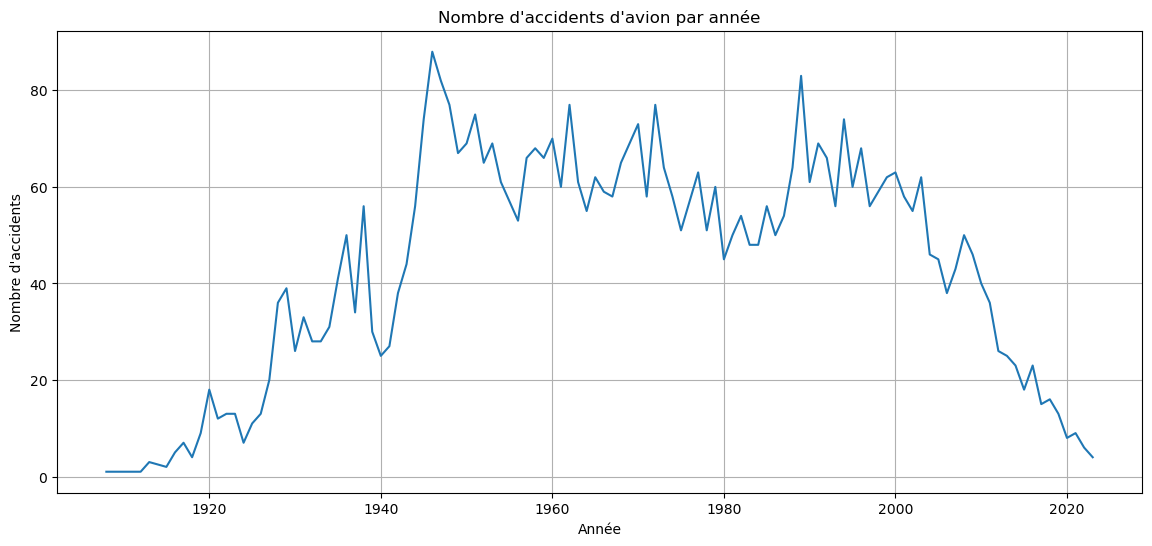

In [35]:
# Affichage d'une tendance sur le temps
plt.figure(figsize=(14,6))
accidents_per_year.plot()
plt.title("Nombre d'accidents d'avion par année")
plt.xlabel("Année")
plt.ylabel("Nombre d'accidents")
plt.grid(True)
plt.show()

---

### **Lecture du graphique**

* **Montée forte jusqu'aux années 1940-1950**
  ➤ Corrélée à l’expansion de l’aviation civile et surtout militaire (Seconde Guerre mondiale).

* **Plateau élevé entre 1950 et 1980**
  ➤ L'aviation commerciale se généralise, mais les normes de sécurité ne sont pas encore optimales.

* **Fluctuations de 1980 à 2000**
  ➤ Des pics liés à des incidents majeurs, mais la tendance reste stable. Début d’améliorations technologiques.

* **Baisse nette après 2000, accélérée après 2010**
  ➤ Mise en œuvre rigoureuse des normes de sécurité aérienne, fiabilité accrue des avions, régulation internationale, maintenance renforcée.

---

### **Conclusion claire** :

**Tendance générale : baisse marquée des accidents après 2000**
Cela reflète des **progrès majeurs en sécurité aérienne** : meilleure technologie, formation des équipages, contrôle du trafic, etc.

Pour approfondir : comparer avec le **nombre de vols effectués** par année (accidents par million de vols) donnerait un taux encore plus parlant.


## 3. Analyse statistique

In [16]:
# Statistiques sur les décès
fatal_stats = df['Fatalities'].describe()
print(fatal_stats)

count    4998.000000
mean       22.337735
std        35.045081
min         0.000000
25%         4.000000
50%        11.000000
75%        25.000000
max       583.000000
Name: Fatalities, dtype: float64


Analyse pertinente de la distribution des **décès par accident (Fatalities)** :

---

### **Statistiques descriptives** :

* **Nombre d'accidents analysés** : 4 998
* **Moyenne** : \~22 décès par accident
* **Médiane (50%)** : 11 décès → **la moitié des accidents font 11 morts ou moins**
* **Écart-type élevé (35)** : grande dispersion → **forte variabilité**
* **Max** : 583 décès → présence de **catastrophes majeures**
* **25% des accidents font ≤ 4 morts**, **75% ≤ 25 morts**

---

### **Interprétation** :

* **Distribution très asymétrique** (droite) :
  → Peu d’accidents très meurtriers tirent la moyenne vers le haut.
  → La médiane étant bien plus basse que la moyenne confirme cette **présence d’outliers**.

* **Majorité des accidents = gravité modérée**, mais :
  → **Quelques événements extrêmes** (ex. : crashs de gros porteurs) ont un **poids statistique énorme**.

---

### Conclusion :

* La gravité des accidents est **très variable**, la plupart font relativement peu de victimes, **mais certains sont catastrophiques**.
* Une **analyse complémentaire par type d’appareil ou par période** permettrait d’identifier les causes de ces extrêmes.


In [17]:
# Moyenne, médiane, écart type des décès
mean = df['Fatalities'].mean()
median = df['Fatalities'].median()
std_dev = df['Fatalities'].std()
print("Moyenne :", mean, "| Médiane :", median, "| Écart type :", std_dev)

Moyenne : 22.337735094037615 | Médiane : 11.0 | Écart type : 35.04508061393761


In [19]:
from scipy import stats


In [20]:
# Test d’hypothèse : différence moyenne de décès entre 1950s et 2000s
fatal_1950s = df[df['Decade'] == 1950]['Fatalities']
fatal_2000s = df[df['Decade'] == 2000]['Fatalities']

t_stat, p_val = stats.ttest_ind(fatal_1950s, fatal_2000s, equal_var=False)
print("T-test décès 1950s vs 2000s — t =", t_stat, "| p =", p_val)

T-test décès 1950s vs 2000s — t = -2.097831779807533 | p = 0.036300875233167273


---

### **Résultat** :

* **t = -2.10**
* **p = 0.0363**

---

### **Interprétation** :

* La valeur **p < 0.05** → différence **statistiquement significative** entre les deux décennies.
* Le **t négatif** indique que la **moyenne des décès dans les années 2000 est inférieure** à celle des années 1950.

---

### **Conclusion** :

Il y a **moins de morts par accident dans les années 2000** par rapport aux années 1950, et cette différence **n’est pas due au hasard**.
Cela confirme une **amélioration réelle de la sécurité aérienne** au fil du temps.

---



## 4. Visualisations supplémentaires

In [22]:
import seaborn as sns


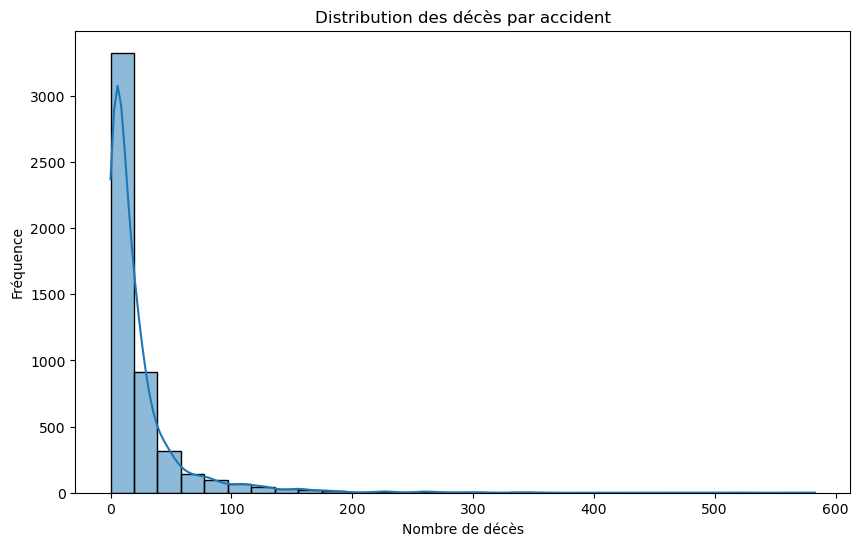

In [23]:
# Histogramme du nombre de décès
plt.figure(figsize=(10,6))
sns.histplot(df['Fatalities'], bins=30, kde=True)
plt.title("Distribution des décès par accident")
plt.xlabel("Nombre de décès")
plt.ylabel("Fréquence")
plt.show()

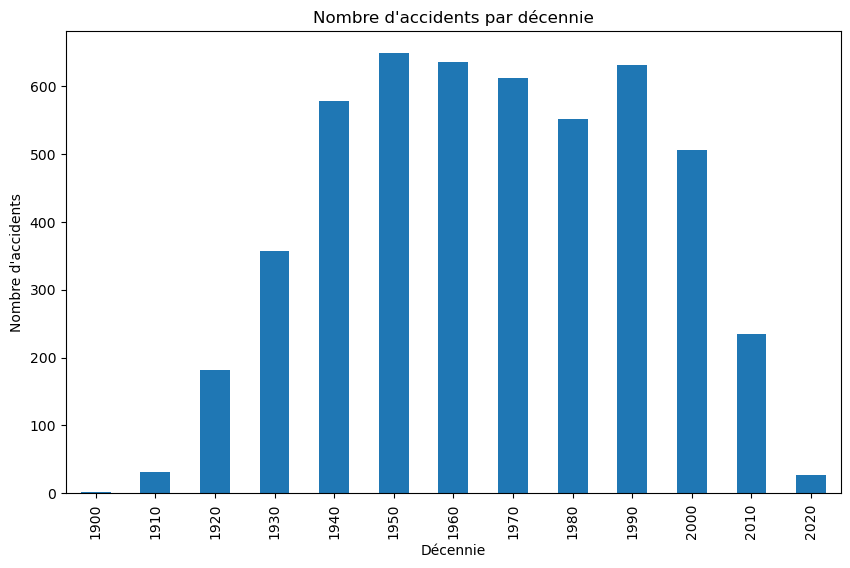

In [24]:
# Accidents par décennie
plt.figure(figsize=(10,6))
df['Decade'].value_counts().sort_index().plot(kind='bar')
plt.title("Nombre d'accidents par décennie")
plt.xlabel("Décennie")
plt.ylabel("Nombre d'accidents")
plt.show()

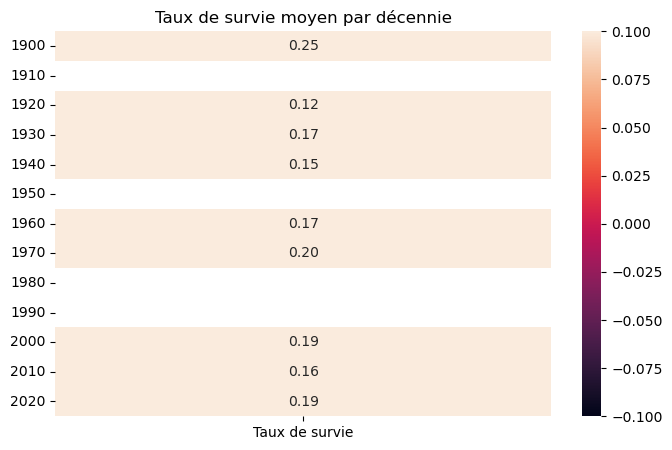

In [25]:
# Heatmap du taux de survie moyen par décennie
plt.figure(figsize=(8,5))
survival_by_decade = df.groupby('Decade')['Survival_Rate'].mean()
sns.heatmap(survival_by_decade.values.reshape(-1,1), annot=True, fmt=".2f",
            yticklabels=survival_by_decade.index, xticklabels=["Taux de survie"])
plt.title("Taux de survie moyen par décennie")
plt.show()

## 5. Rapport et interprétation

In [ ]:
# Supprimer les lignes où 'Aboard' est 0 ou manquant
df = df[df['Aboard'] > 0].copy()

# Calcul du taux de survie si non déjà fait
df['Survival_Rate'] = (df['Aboard'] - df['Fatalities']) / df['Aboard']


RÉSUMÉ :
- Le nombre total d'accidents dans le dataset est : 4975
- Le nombre total de décès est : 111561
- Le taux de survie moyen est de 18.15%
- Il y a une différence statistiquement significative entre les décès moyens dans les années 1950 et 2000 (p < 0.05).